### Imports

For your convenience, we have included a few pre-written functions, which you might find useful in your analysis. They are by no means necessary, but feel free to use any or all of them. The code for these functions can be found in /src

In [57]:
import pandas as pd
import os
import sys
import missingno as msno
from tqdm.notebook import tqdm

In [58]:
src_path = os.path.abspath('../src/')
sys.path.append(src_path)

In [59]:
# to allow for all variables to be displayed in jupyter
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [60]:
def column_std(df):
    """
    Standardizes column names
    """
    df.columns = map(str.lower, df.columns)
    df.columns = df.columns.str.replace(', ', '_')
    df.columns = df.columns.str.replace('-', '_')
    df.columns = df.columns.str.replace('/', '_')
    df.columns = df.columns.str.replace('(', '_')
    df.columns = df.columns.str.replace(')', '_')
    df.columns = df.columns.str.replace(' ', '_')
    print(df.columns)
    return df

### Data

In [61]:
input_loc = '../data/Master Project Data/'
output_loc = '../data/processed/'

In [62]:
arc = pd.read_csv(input_loc + 'ARC Preparedness Data.csv', dtype = {'GEOID': str, 'Zip': str})
arc

GEOID  Census Block Group Y  Census Block Group X  \
0       #_010010201001             32.465832            -86.489661   
1       #_010010201002             32.485867            -86.489671   
2       #_010010203001             32.480175            -86.460793   
3       #_010010203002             32.464309            -86.458472   
4       #_010010204002             32.470417            -86.435966   
...                ...                   ...                   ...   
862052  #_560459513003             43.843551           -104.260072   
862053  #_560459513003             43.843551           -104.260072   
862054  #_560459513003             43.843551           -104.260072   
862055  #_560459513003             43.843551           -104.260072   
862056  #_560459513003             43.843551           -104.260072   

              City State    Zip   County In-Home Visit Date  \
0       PRATTVILLE    AL  36067  Autauga          2/27/2016   
1       PRATTVILLE    AL  36067  Autauga          1/16/2015   
2       PRATTVILLE    AL  36067  Autauga          2/27/2016   
3       PRATTVILLE    AL  36067  Autauga          9/26/2015   
4       PRATTVILLE    AL  36066  Autauga          11/1/2015   
...            ...   ...    ...      ...                ...   
862052   NEWCASTLE    WY  82701   Weston          4/28/2018   
862053   NEWCASTLE    WY  82701   Weston          4/28/2018   
862054   NEWCASTLE    WY  82701   Weston          4/28/2018   
862055   NEWCASTLE    WY  82701   Weston          4/28/2018   
862056   NEWCASTLE    WY  82701   Weston          6/28/2019   

        Smoke Alarms Installed (9-Volt/10-Year/DHH)  \
0                                                 1   
1                                                 1   
2                                                 1   
3                                                 1   
4                                                 2   
...                                             ...   
862052                                            3   
862053                                            3   
862054                                            4   
862055                                            2   
862056                                            4   

        10-Year and 9-Volt Alarms Installed  DHH Alarms Installed  \
0                                         1                     0   
1                                         1                     0   
2                                         1                     0   
3                                         1                     0   
4                                         2                     0   
...                                     ...                   ...   
862052                                    3                     0   
862053                                    3                     0   
862054                                    4                     0   
862055                                    2                     0   
862056                                    4                     0   

        Pre-Existing Alarms  Pre-Existing Alarms Tested and Working  \
0                       NaN                                     NaN   
1                       NaN                                     NaN   
2                       NaN                                     NaN   
3                       NaN                                     NaN   
4                       NaN                                     NaN   
...                     ...                                     ...   
862052                  NaN                                     NaN   
862053                  NaN                                     NaN   
862054                  NaN                                     NaN   
862055                  NaN                                     NaN   
862056                  4.0                                     0.0   

        Batteries Replaced  Fire Escape Plans Made  \
0                     

In [63]:
acs = pd.read_csv(input_loc + 'ACS 5YR Block Block Data.csv', encoding='latin-1')
acs

GEOID                                               NAME  \
0       #_530019501001  Block Group 1, Census Tract 9501, Adams County...   
1       #_530019501002  Block Group 2, Census Tract 9501, Adams County...   
2       #_530019501003  Block Group 3, Census Tract 9501, Adams County...   
3       #_530019502001  Block Group 1, Census Tract 9502, Adams County...   
4       #_530019502002  Block Group 2, Census Tract 9502, Adams County...   
...                ...                                                ...   
217734  #_110010110003  Block Group 3, Census Tract 110, District of C...   
217735  #_110010110004  Block Group 4, Census Tract 110, District of C...   
217736  #_110010111001  Block Group 1, Census Tract 111, District of C...   
217737  #_110010111002  Block Group 2, Census Tract 111, District of C...   
217738  #_110010111003  Block Group 3, Census Tract 111, District of C...   

                 county_name            state_name  tot_population  \
0               Adams County            Washington             842   
1               Adams County            Washington             922   
2               Adams County            Washington             515   
3               Adams County            Washington             530   
4               Adams County            Washington             679   
...                      ...                   ...             ...   
217734  District of Columbia  District of Columbia             770   
217735  District of Columbia  District of Columbia            1611   
217736  District of Columbia  District of Columbia            1753   
217737  District of Columbia  District of Columbia            2098   
217738  District of Columbia  District of Columbia            1453   

        in_poverty  inc_pct_poverty  inc_pcincome  age_pct_under25  \
0               64         0.076010       28484.0         0.738717   
1               94         0.101952       29939.0         0.737219   
2               99         0.192233       18968.0         0.738832   
3               65         0.122642       23378.0         0.783019   
4              158         0.232695       25441.0         0.886598   
...            ...              ...           ...              ...   
217734          52         0.067532       78303.0         0.463636   
217735         108         0.067039       68654.0         0.579764   
217736         148         0.084427       44296.0         0.769841   
217737         391         0.186368       32402.0         0.799333   
217738         584         0.401927       19928.0         0.651839   

        age_pct_25_64  age_pct_over65  educ_tot_pop  educ_no_school  \
0            0.494062        0.166271           556        0.010791   
1            0.572597        0.228016           783        0.005109   
2            0.541237        0.209622           437        0.016018   
3            0.443396        0.273585           380        0.002632   
4            0.587629        0.083947           456        0.008772   
...               ...             ...           ...             ...   
217734       0.796104        0.197403           765        0.000000   
217735       0.649907        0.234637          1425        0.000000   
217736       0.565193        0.154195          1269        0.004728   
217737       0.595806        0.162536          1591        0.000000   
217738       0.515421        0.280546          1342        0.022355   

        educ_nursery_4th  educ_5th_6th  educ_7th_8th  educ_9th  educ_10th  \
0               0.000000      0.000000      0.016187  0.026978   0.003597   
1               0.005109      0.000000      0.000000  0.003831   0.007663   
2               0.000000      0.000000      0.057208  0.027460   0.018307   
3               0.002632      0.000000      0.007895  0.000000   0.010526   
4               0.000000      0.000000      0.000000  0.010965   0.000000   
...                  ...           ...           ...       ...        ...   
217734          0.

## Describing the Data

### Data Shape

<i>Needs an arc-acs one-to-many join</i>

In [64]:
arc.shape

(862057, 23)

In [65]:
acs.shape

(217739, 116)

### Type

*Missing values for the target variable*

In [66]:
arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862057 entries, 0 to 862056
Data columns (total 23 columns):
 #   Column                                                             Non-Null Count   Dtype  
---  ------                                                             --------------   -----  
 0   GEOID                                                              862057 non-null  object 
 1   Census Block Group Y                                               862057 non-null  float64
 2   Census Block Group X                                               862057 non-null  float64
 3   City                                                               862057 non-null  object 
 4   State                                                              862057 non-null  object 
 5   Zip                                                                862057 non-null  object 
 6   County                                                             862057 non-null  object 
 7   In-Home Vis

In [67]:
# change to datetime
arc['In-Home Visit Date'] = pd.to_datetime(arc['In-Home Visit Date'])

In [68]:
acs.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217739 entries, 0 to 217738
Data columns (total 116 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   GEOID                         object 
 1   NAME                          object 
 2   county_name                   object 
 3   state_name                    object 
 4   tot_population                int64  
 5   in_poverty                    int64  
 6   inc_pct_poverty               float64
 7   inc_pcincome                  float64
 8   age_pct_under25               float64
 9   age_pct_25_64                 float64
 10  age_pct_over65                float64
 11  educ_tot_pop                  int64  
 12  educ_no_school                float64
 13  educ_nursery_4th              float64
 14  educ_5th_6th                  float64
 15  educ_7th_8th                  float64
 16  educ_9th                      float64
 17  educ_10th                     float64
 18  educ_11th              

In [69]:
acs['house_density_occ'] = acs.house_tot_occ_cnt/acs.tot_population
acs['house_density'] = acs.total_housing_units/acs.tot_population

## Cleaning

### Combine and/or Reshape

In [70]:
df = pd.merge(arc, acs, on="GEOID", how="inner")

In [71]:
print(arc.shape, acs.shape, df.shape)

(862057, 23) (217739, 118) (862054, 140)


In [72]:
arc[arc.GEOID == "#_NA"]

GEOID  Census Block Group Y  Census Block Group X     City State    Zip  \
67453  #_NA               36.8196           -122.051878  BIG SUR    CA  93920   
67454  #_NA               36.8196           -122.051878  BIG SUR    CA  93920   
67455  #_NA               36.8196           -122.051878  BIG SUR    CA  93920   

         County In-Home Visit Date  \
67453  Monterey         2019-04-23   
67454  Monterey         2019-04-23   
67455  Monterey         2019-04-23   

       Smoke Alarms Installed (9-Volt/10-Year/DHH)  \
67453                                            2   
67454                                            2   
67455                                            5   

       10-Year and 9-Volt Alarms Installed  DHH Alarms Installed  \
67453                                    2                     0   
67454                                    2                     0   
67455                                    5                     0   

       Pre-Existing Alarms  Pre-Existing Alarms Tested and Working  \
67453                  1.0                                     0.0   
67454                  0.0                                     0.0   
67455                  1.0                                     0.0   

       Batteries Replaced  Fire Escape Plans Made  \
67453                   0                       0   
67454                   0                       0   
67455                   0                       1   

       Fire Safety Checklists Completed  \
67453                                 0   
67454                                 0   
67455                                 1   

       Additional Hazard Education Conducted Additional Hazard Type  \
67453                                      0                   None   
67454                                      0                   None   
67455                                      1             Earthquake   

       People Served  Youth Served  Seniors Served  \
67453              1             0               0   
67454              1             0               0   
67455              3             0               1   

       Veterans, Military Members and Military Family Members Served  \
67453                                                  0               
67454                                                  0               
67455                                                  0               

       Individuals with Disabilities, Access, or Functional Needs Served  
67453                                                  0                  
67454                                                  0                  
67455                                                  0

In [73]:
df.head()

GEOID  Census Block Group Y  Census Block Group X        City  \
0  #_010010201001             32.465832            -86.489661  PRATTVILLE   
1  #_010010201002             32.485867            -86.489671  PRATTVILLE   
2  #_010010203001             32.480175            -86.460793  PRATTVILLE   
3  #_010010203002             32.464309            -86.458472  PRATTVILLE   
4  #_010010204002             32.470417            -86.435966  PRATTVILLE   

  State    Zip   County In-Home Visit Date  \
0    AL  36067  Autauga         2016-02-27   
1    AL  36067  Autauga         2015-01-16   
2    AL  36067  Autauga         2016-02-27   
3    AL  36067  Autauga         2015-09-26   
4    AL  36066  Autauga         2015-11-01   

   Smoke Alarms Installed (9-Volt/10-Year/DHH)  \
0                                            1   
1                                            1   
2                                            1   
3                                            1   
4                                            2   

   10-Year and 9-Volt Alarms Installed  DHH Alarms Installed  \
0                                    1                     0   
1                                    1                     0   
2                                    1                     0   
3                                    1                     0   
4                                    2                     0   

   Pre-Existing Alarms  Pre-Existing Alarms Tested and Working  \
0                  NaN                                     NaN   
1                  NaN                                     NaN   
2                  NaN                                     NaN   
3                  NaN                                     NaN   
4                  NaN                                     NaN   

   Batteries Replaced  Fire Escape Plans Made  \
0                   0                       1   
1                   0                       1   
2                   0                       1   
3                   0                       1   
4                   2                       1   

   Fire Safety Checklists Completed  Additional Hazard Education Conducted  \
0                                 1                                      1   
1                                 0                                      0   
2                                 1                                      1   
3                                 1                                      0   
4                                 1                                      0   

  Additional Hazard Type  People Served  Youth Served  Seniors Served  \
0              Tornadoes              2             0               0   
1                   None              1             0               0   
2             Hurricanes              5             0               0   
3                   None              5             0               0   
4                   None              2             0               0   

   Veterans, Military Members and Military Family Members Served  \
0                                                  0               
1                                                  0               
2                                                  0               
3                                                  0               
4                                                  0               

   Individuals with Disabilities, Access, or Functional Needs Served  \
0                                                  0                   
1                                                  0                   
2                                                  0                   
3                                                  0                   
4                                                  0                   

                                                NAME     county_name  \
0  Block Group 1, Census Tract 201, Autauga Count...  Autauga County   


### Variable Names

In [74]:
acs = column_std(acs)

Index(['geoid', 'name', 'county_name', 'state_name', 'tot_population',
       'in_poverty', 'inc_pct_poverty', 'inc_pcincome', 'age_pct_under25',
       'age_pct_25_64',
       ...
       'house_val_250k_300k', 'house_val_300k_400k', 'house_val_400k_500k',
       'house_val_500k_750k', 'house_val_750k_1m', 'house_val_1m_1.5m',
       'house_val_1.5m_2m', 'house_val_more_2m', 'house_density_occ',
       'house_density'],
      dtype='object', length=118)


In [75]:
df = column_std(df)

Index(['geoid', 'census_block_group_y', 'census_block_group_x', 'city',
       'state', 'zip', 'county', 'in_home_visit_date',
       'smoke_alarms_installed__9_volt_10_year_dhh_',
       '10_year_and_9_volt_alarms_installed',
       ...
       'house_val_250k_300k', 'house_val_300k_400k', 'house_val_400k_500k',
       'house_val_500k_750k', 'house_val_750k_1m', 'house_val_1m_1.5m',
       'house_val_1.5m_2m', 'house_val_more_2m', 'house_density_occ',
       'house_density'],
      dtype='object', length=140)


### Duplicates
We assume duplicate rows are visits to multiple households in the data.

In [77]:
df.drop_duplicates().shape[0] - arc.drop_duplicates().shape[0]

-3

In [78]:
categoricals = df.select_dtypes(include=[np.object]).columns

### Categorical Encoding

In [79]:
# will do in next book

### Missing Data

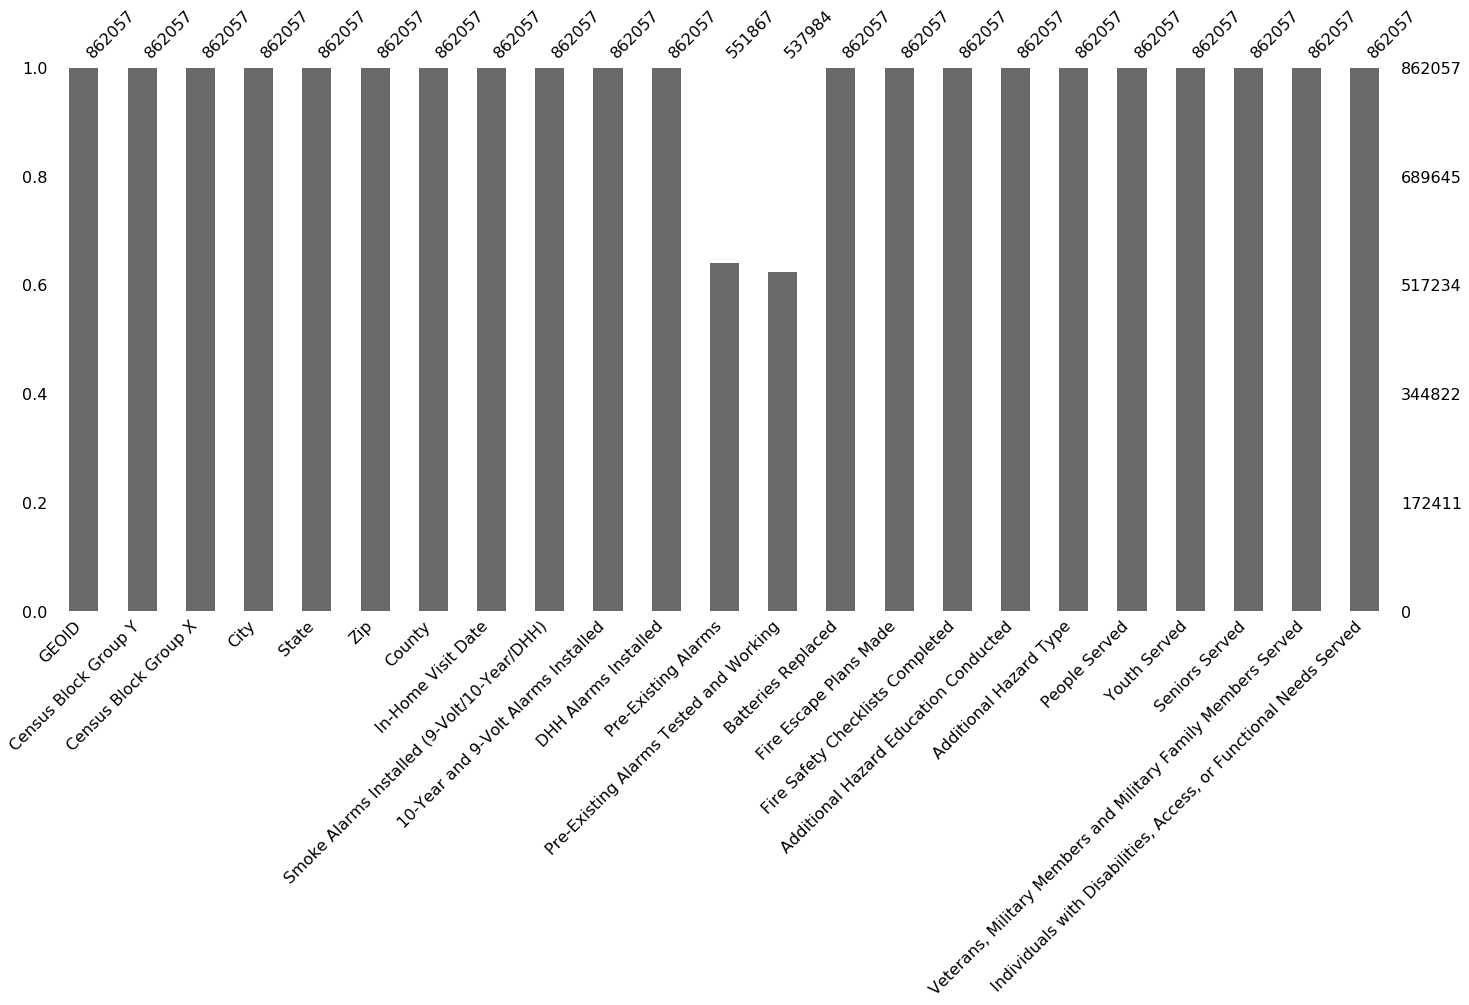

In [114]:
msno.bar(arc);

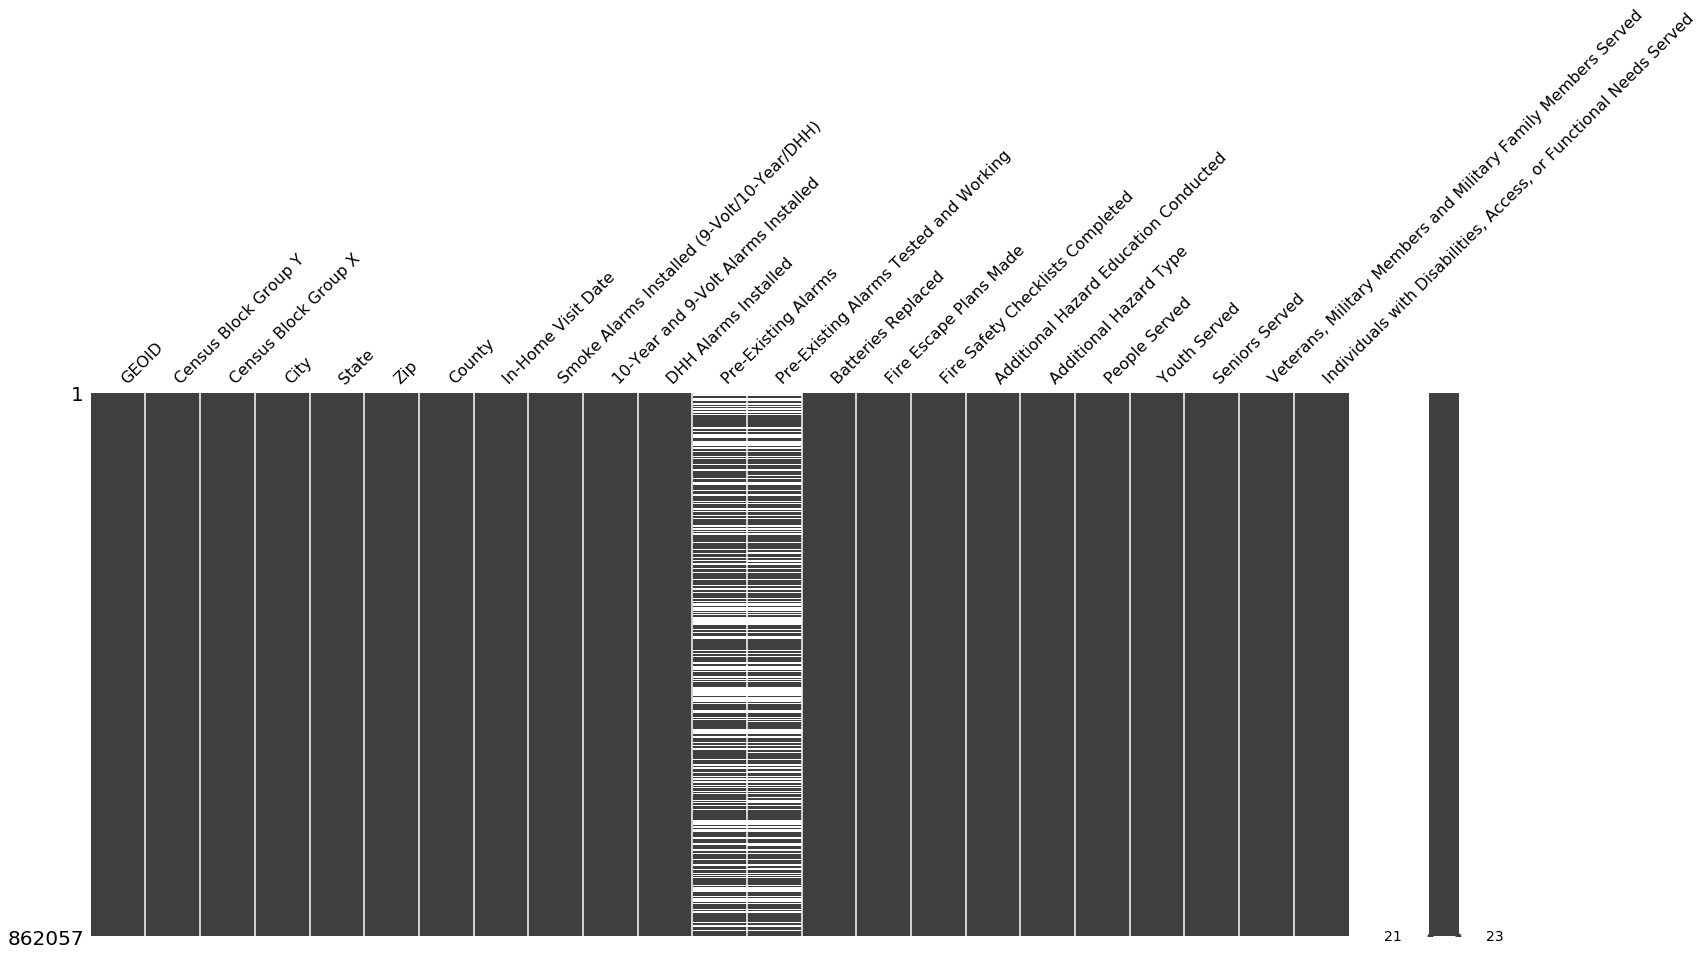

In [115]:
msno.matrix(arc);

In [82]:
df[df.pre_existing_alarms.isna()]

geoid  census_block_group_y  census_block_group_x  \
0       #_010010201001             32.465832            -86.489661   
1       #_010010201002             32.485867            -86.489671   
2       #_010010203001             32.480175            -86.460793   
3       #_010010203002             32.464309            -86.458472   
4       #_010010204002             32.470417            -86.435966   
...                ...                   ...                   ...   
862048  #_560459513003             43.843551           -104.260072   
862049  #_560459513003             43.843551           -104.260072   
862050  #_560459513003             43.843551           -104.260072   
862051  #_560459513003             43.843551           -104.260072   
862052  #_560459513003             43.843551           -104.260072   

              city state    zip   county in_home_visit_date  \
0       PRATTVILLE    AL  36067  Autauga         2016-02-27   
1       PRATTVILLE    AL  36067  Autauga         2015-01-16   
2       PRATTVILLE    AL  36067  Autauga         2016-02-27   
3       PRATTVILLE    AL  36067  Autauga         2015-09-26   
4       PRATTVILLE    AL  36066  Autauga         2015-11-01   
...            ...   ...    ...      ...                ...   
862048   NEWCASTLE    WY  82701   Weston         2018-04-28   
862049   NEWCASTLE    WY  82701   Weston         2018-04-28   
862050   NEWCASTLE    WY  82701   Weston         2018-04-28   
862051   NEWCASTLE    WY  82701   Weston         2018-04-28   
862052   NEWCASTLE    WY  82701   Weston         2018-04-28   

        smoke_alarms_installed__9_volt_10_year_dhh_  \
0                                                 1   
1                                                 1   
2                                                 1   
3                                                 1   
4                                                 2   
...                                             ...   
862048                                            3   
862049                                            3   
862050                                            3   
862051                                            4   
862052                                            2   

        10_year_and_9_volt_alarms_installed  dhh_alarms_installed  \
0                                         1                     0   
1                                         1                     0   
2                                         1                     0   
3                                         1                     0   
4                                         2                     0   
...                                     ...                   ...   
862048                                    3                     0   
862049                                    3                     0   
862050                                    3                     0   
862051                                    4                     0   
862052                                    2                     0   

        pre_existing_alarms  pre_existing_alarms_tested_and_working  \
0                       NaN                                     NaN   
1                       NaN                                     NaN   
2                       NaN                                     NaN   
3                       NaN                                     NaN   
4                       NaN                                     NaN   
...                     ...                                     ...   
862048                  NaN                                     NaN   
862049                  NaN                                     NaN   
862050                  NaN                                     NaN   
862051                  NaN                                     NaN   
862052                  NaN                                     NaN   

        batteries_replaced  fire_escape_plans_made  \
0                     

In [83]:
df[df.pre_existing_alarms == 0]

geoid  census_block_group_y  census_block_group_x  \
12      #_010010205002             32.470418            -86.424166   
18      #_010010208012             32.455173            -86.534591   
23      #_010010208021             32.524822            -86.573009   
24      #_010010208021             32.524822            -86.573009   
27      #_010010208023             32.543983            -86.492100   
...                ...                   ...                   ...   
862004  #_560399677024             43.477369           -110.841056   
862018  #_560459513001             43.881603           -104.257527   
862019  #_560459513001             43.881603           -104.257527   
862031  #_560459513002             43.854118           -104.180737   
862039  #_560459513003             43.843551           -104.260072   

              city state    zip   county in_home_visit_date  \
12      PRATTVILLE    AL  36066  Autauga         2016-09-09   
18      PRATTVILLE    AL  36067  Autauga         2019-09-30   
23      PRATTVILLE    AL  36067  Autauga         2019-05-04   
24      PRATTVILLE    AL  36067  Autauga         2019-09-27   
27      PRATTVILLE    AL  36067  Autauga         2017-12-02   
...            ...   ...    ...      ...                ...   
862004     JACKSON    WY  83001    Teton         2019-05-05   
862018   NEWCASTLE    WY  82701   Weston         2017-03-04   
862019   NEWCASTLE    WY  82701   Weston         2017-03-04   
862031   NEWCASTLE    WY  82701   Weston         2017-03-04   
862039   NEWCASTLE    WY  82701   Weston         2017-03-04   

        smoke_alarms_installed__9_volt_10_year_dhh_  \
12                                                1   
18                                                2   
23                                                3   
24                                                1   
27                                                3   
...                                             ...   
862004                                            3   
862018                                            3   
862019                                            3   
862031                                            3   
862039                                            3   

        10_year_and_9_volt_alarms_installed  dhh_alarms_installed  \
12                                        1                     0   
18                                        2                     0   
23                                        2                     1   
24                                        1                     0   
27                                        3                     0   
...                                     ...                   ...   
862004                                    3                     0   
862018                                    3                     0   
862019                                    3                     0   
862031                                    3                     0   
862039                                    3                     0   

        pre_existing_alarms  pre_existing_alarms_tested_and_working  \
12                      0.0                                     0.0   
18                      0.0                                     0.0   
23                      0.0                                     0.0   
24                      0.0                                     0.0   
27                      0.0                                     0.0   
...                     ...                                     ...   
862004                  0.0                                     0.0   
862018                  0.0                                     0.0   
862019                  0.0                                     0.0   
862031                  0.0                                     0.0   
862039                  0.0                                     0.0   

        batteries_replaced  fire_escape_plans_made  \
12                    

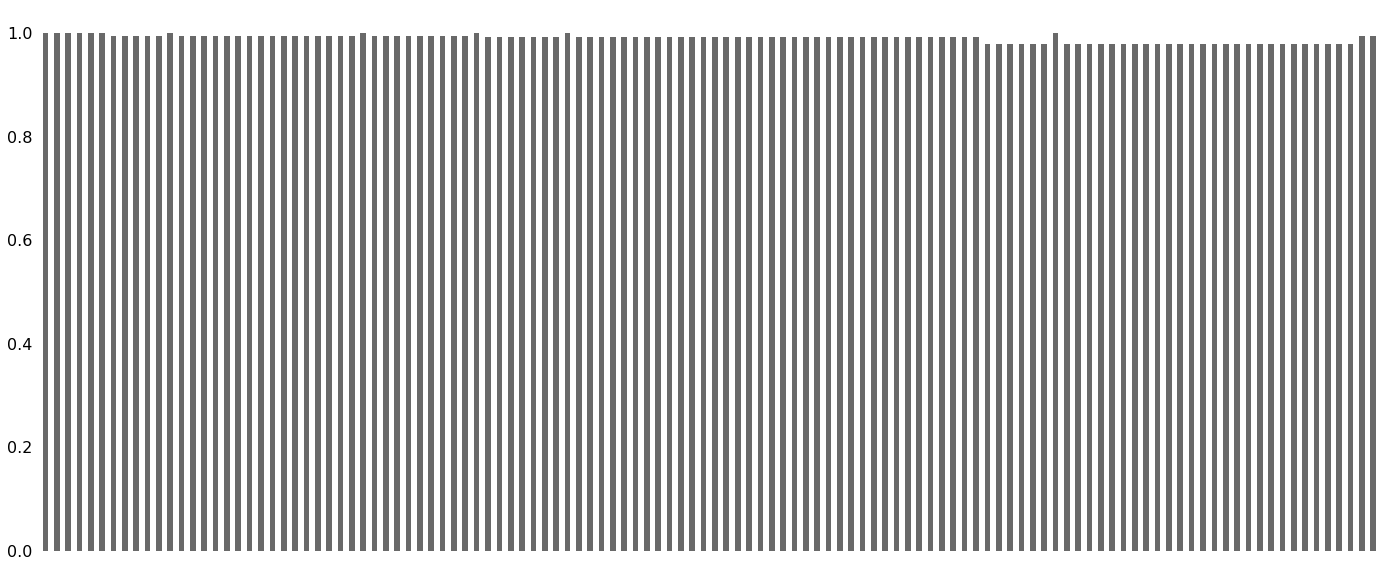

In [116]:
msno.bar(acs);

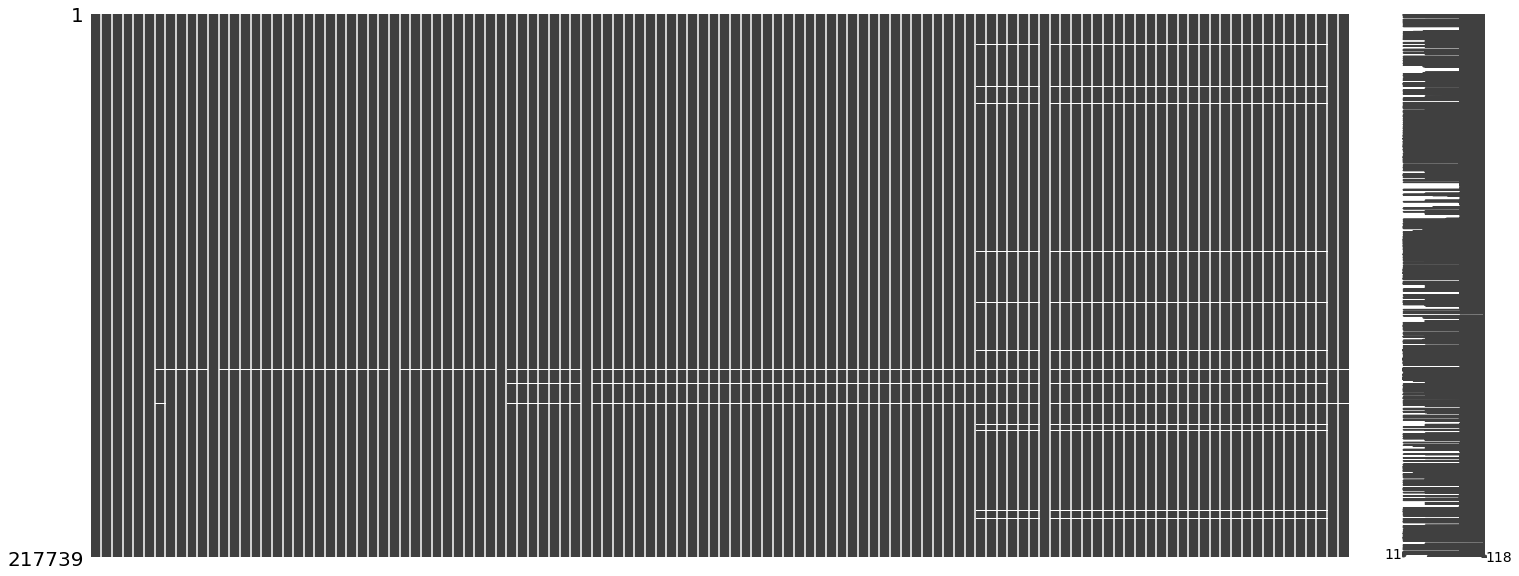

In [117]:
msno.matrix(acs);

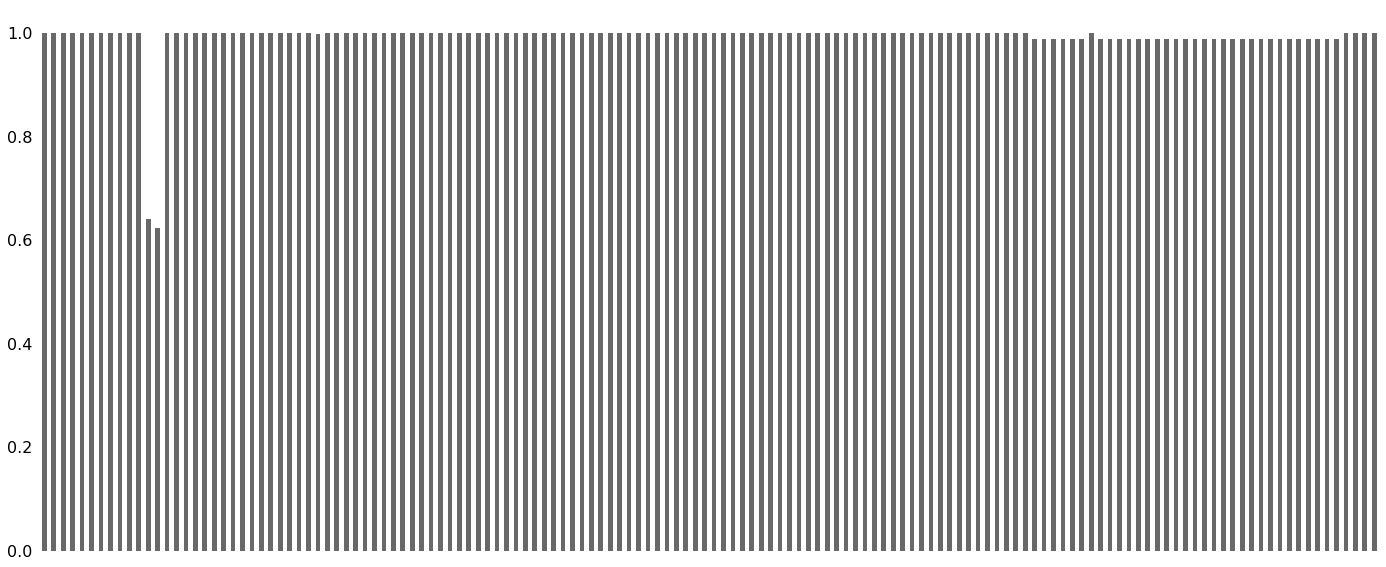

In [118]:
msno.bar(df);

In [119]:
msno.matrix(df);

MemoryError: Unable to allocate 3.65 GiB for an array with shape (862039, 142, 4) and data type float64

<Figure size 1800x720 with 2 Axes>

## Verifying the Data Quality

### Data Source and Reliability

*ARC = Possible hand-entry by surveyors and likely to have errors*


*ACS = Official entry by federal agency with two centuries of experience. Unlikely to have errors.*

### Error Handling

In [88]:
suspicious = []
for i in tqdm(range(df.shape[0])):
    suspicious.append(df.county[i] in df.county_name[i])
    if not i%5e4:
        print(f"{i} done")
len(suspicious)
# df[df.county_name != df.county].select_dtypes(include=[np.object])

0 done
50000 done
100000 done
150000 done
200000 done
250000 done
300000 done
350000 done
400000 done
450000 done
500000 done
550000 done
600000 done
650000 done
700000 done
750000 done
800000 done
850000 done



862054

In [89]:
df['unmatched_counties']=pd.Series(suspicious)

In [90]:
df[df.unmatched_counties == False].select_dtypes(include=[np.object])

geoid        city state    zip      county  \
32      #_010010209004  DEATSVILLE    AL  36022      Elmore   
37      #_010030101002    STOCKTON    AL  36529  Washington   
244     #_010090503001     ALTOONA    AL  35952      Etowah   
248     #_010090504001      HORTON    AL  35980    Marshall   
265     #_010090506011     WARRIOR    AL  35180   Jefferson   
...                ...         ...   ...    ...         ...   
859960  #_551390022021     FREMONT    WI  54940     Waupaca   
859961  #_551390022021     FREMONT    WI  54940     Waupaca   
859997  #_551390025001    APPLETON    WI  54915   Outagamie   
859998  #_551390025002    APPLETON    WI  54915   Outagamie   
859999  #_551390025003    APPLETON    WI  54915   Outagamie   

       additional_hazard_type  \
32                  Tornadoes   
37                  Tornadoes   
244                      None   
248                  Flooding   
265                 Tornadoes   
...                       ...   
859960              Tornadoes   
859961              Tornadoes   
859997              Tornadoes   
859998              Tornadoes   
859999                   None   

                                                     name       county_name  \
32      Block Group 4, Census Tract 209, Autauga Count...    Autauga County   
37      Block Group 2, Census Tract 101, Baldwin Count...    Baldwin County   
244     Block Group 1, Census Tract 503, Blount County...     Blount County   
248     Block Group 1, Census Tract 504, Blount County...     Blount County   
265     Block Group 1, Census Tract 506.01, Blount Cou...     Blount County   
...                                                   ...               ...   
859960  Block Group 1, Census Tract 22.02, Winnebago C...  Winnebago County   
859961  Block Group 1, Census Tract 22.02, Winnebago C...  Winnebago County   
859997  Block Group 1, Census Tract 25, Winnebago Coun...  Winnebago County   
859998  Block Group 2, Census Tract 25, Winnebago Coun...  Winnebago County   
859999  Block Group 3, Census Tract 25, Winnebago Coun...  Winnebago County   

       state_name  
32        Alabama  
37        Alabama  
244       Alabama  
248       Alabama  
265       Alabama  
...           ...  
859960  Wisconsin  
859961  Wisconsin  
859997  Wisconsin  
859998  Wisconsin  
859999  Wisconsin  

[38928 rows x 9 columns]

In [91]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [92]:
states[df.state[2]]

'Alabama'

In [93]:
unmatched_state = []
for i in tqdm(range(df.shape[0])):
    unmatched_state.append(states[df.state[i]] == df.state_name[i])
    if not i%5e4:
        print(f"{i} done")
df['unmatched_state'] = pd.Series(unmatched_state)

0 done
50000 done
100000 done
150000 done
200000 done
250000 done
300000 done
350000 done
400000 done
450000 done
500000 done
550000 done
600000 done
650000 done
700000 done
750000 done
800000 done
850000 done



In [94]:
df[df.unmatched_state == False].select_dtypes(include=[np.object])

geoid            city state    zip      county  \
270502  #_191315601002           ADAMS    MN  55909       Mower   
296192  #_210759601005          FULTON    TN  42041      Fulton   
304683  #_211110075011  JEFFERSONVILLE    IN  47130       Clark   
309305  #_211110117102      LOUISVILLE    IN  40229   Jefferson   
462964  #_330079501003       LEMINGTON    VT  05903       Essex   
543991  #_360790101003   NEW FAIRFIELD    CT  06812   Fairfield   
631849  #_391059646001      RAVENSWOOD    WV  26164     Jackson   
631850  #_391059646001      RAVENSWOOD    WV  26164     Jackson   
751572  #_050930112002         HENNING    TN  38041  Lauderdale   
815806  #_511410302006          STUART    NC  24171     Patrick   
844599  #_540570101002      CUMBERLAND    MD  21502    Allegany   
844600  #_540570101002      CUMBERLAND    MD  21502    Allegany   
844601  #_540570101002      CUMBERLAND    MD  21502    Allegany   
844632  #_540599571003          LOVELY    KY  41231      Martin   
844743  #_540599575003          BELFRY    KY  41514        Pike   

       additional_hazard_type  \
270502                   None   
296192                  Other   
304683              Tornadoes   
309305                  Other   
462964         Winter Weather   
543991         Winter Weather   
631849         Winter Weather   
631850         Winter Weather   
751572                   None   
815806                   None   
844599         Winter Weather   
844600                  Other   
844601                  Other   
844632               Flooding   
844743                   None   

                                                     name         county_name  \
270502  Block Group 2, Census Tract 5601, Mitchell Cou...     Mitchell County   
296192  Block Group 5, Census Tract 9601, Fulton Count...       Fulton County   
304683  Block Group 1, Census Tract 75.01, Jefferson C...    Jefferson County   
309305  Block Group 2, Census Tract 117.10, Jefferson ...    Jefferson County   
462964  Block Group 3, Census Tract 9501, Coos County,...         Coos County   
543991  Block Group 3, Census Tract 101, Putnam County...       Putnam County   
631849  Block Group 1, Census Tract 9646, Meigs County...        Meigs County   
631850  Block Group 1, Census Tract 9646, Meigs County...        Meigs County   
751572  Block Group 2, Census Tract 112, Mississippi C...  Mississippi County   
815806  Block Group 6, Census Tract 302, Patrick Count...      Patrick County   
844599  Block Group 2, Census Tract 101, Mineral Count...      Mineral County   
844600  Block Group 2, Census Tract 101, Mineral Count...      Mineral County   
844601  Block Group 2, Census Tract 101, Mineral Count...      Mineral County   
844632  Block Group 3, Census Tract 9571, Mingo County...        Mingo County   
844743  Block Group 3, Census Tract 9575, Mingo County...        Mingo County   

           state_name  
270502           Iowa  
296192       Kentucky  
304683       Kentucky  
309305       Kentucky  
462964  New Hampshire  
543991       New York  
631849           Ohio  
631850           Ohio  
751572       Arkansas  
815806       Virginia  
844599  West Virginia  
844600  West Virginia  
844601  West Virginia  
844632  West Virginia  
844743  West Virginia

*drop these errors*

In [95]:
df = df.loc[df.unmatched_state]

In [96]:
slim = df.dropna().copy()

### Feature Engineering
- ideal process (two models):
    1. predict missing outcome variables based on visit information (first "micro" model)
    2. group actual and synthesized data by block and join to ACS data
    3. predict average portion of pre-existing smoke alarm per block (second "macro" model)
    
    
- quick process (single model):
    1. drop visits missing information on pre-existing smoke alarms
    2. group remaining visits by block and join to ACS data
    3. predict average likelihood of a pre-existing smoke alarm per block (model)
    

In [97]:
# generate binary target
slim['at_least_one_alarm'] = slim.pre_existing_alarms > 0

In [98]:
slim['at_least_one_alarm_working'] = slim.pre_existing_alarms_tested_and_working > 0

In [99]:
list(slim.columns)

['geoid',
 'census_block_group_y',
 'census_block_group_x',
 'city',
 'state',
 'zip',
 'county',
 'in_home_visit_date',
 'smoke_alarms_installed__9_volt_10_year_dhh_',
 '10_year_and_9_volt_alarms_installed',
 'dhh_alarms_installed',
 'pre_existing_alarms',
 'pre_existing_alarms_tested_and_working',
 'batteries_replaced',
 'fire_escape_plans_made',
 'fire_safety_checklists_completed',
 'additional_hazard_education_conducted',
 'additional_hazard_type',
 'people_served',
 'youth_served',
 'seniors_served',
 'veterans_military_members_and_military_family_members_served',
 'individuals_with_disabilities_access_or_functional_needs_served',
 'name',
 'county_name',
 'state_name',
 'tot_population',
 'in_poverty',
 'inc_pct_poverty',
 'inc_pcincome',
 'age_pct_under25',
 'age_pct_25_64',
 'age_pct_over65',
 'educ_tot_pop',
 'educ_no_school',
 'educ_nursery_4th',
 'educ_5th_6th',
 'educ_7th_8th',
 'educ_9th',
 'educ_10th',
 'educ_11th',
 'educ_12th_no_diploma',
 'educ_high_school_grad',
 'edu

In [100]:
slim.drop(columns=['unmatched_state',  'state', 'zip','county',  'name',
 'county_name',
 'state_name', 'smoke_alarms_installed__9_volt_10_year_dhh_',
 '10_year_and_9_volt_alarms_installed',
 'dhh_alarms_installed','batteries_replaced',
 'fire_escape_plans_made',
 'fire_safety_checklists_completed',
 'additional_hazard_education_conducted',
 'additional_hazard_type', 'unmatched_counties',
 'unmatched_state'])

geoid  census_block_group_y  census_block_group_x  \
12      #_010010205002             32.470418            -86.424166   
18      #_010010208012             32.455173            -86.534591   
23      #_010010208021             32.524822            -86.573009   
24      #_010010208021             32.524822            -86.573009   
27      #_010010208023             32.543983            -86.492100   
...                ...                   ...                   ...   
862038  #_560459513003             43.843551           -104.260072   
862039  #_560459513003             43.843551           -104.260072   
862040  #_560459513003             43.843551           -104.260072   
862041  #_560459513003             43.843551           -104.260072   
862053  #_560459513003             43.843551           -104.260072   

              city in_home_visit_date  pre_existing_alarms  \
12      PRATTVILLE         2016-09-09                  0.0   
18      PRATTVILLE         2019-09-30                  0.0   
23      PRATTVILLE         2019-05-04                  0.0   
24      PRATTVILLE         2019-09-27                  0.0   
27      PRATTVILLE         2017-12-02                  0.0   
...            ...                ...                  ...   
862038   NEWCASTLE         2017-03-04                  5.0   
862039   NEWCASTLE         2017-03-04                  0.0   
862040   NEWCASTLE         2017-03-04                  5.0   
862041   NEWCASTLE         2017-03-04                  1.0   
862053   NEWCASTLE         2019-06-28                  4.0   

        pre_existing_alarms_tested_and_working  people_served  youth_served  \
12                                         0.0              2             0   
18                                         0.0              5             0   
23                                         0.0              1             0   
24                                         0.0              1             0   
27                                         0.0              1             0   
...                                        ...            ...           ...   
862038                                     3.0              1             0   
862039                                     0.0              4             2   
862040                                     0.0              2             0   
862041                                     0.0              3             0   
862053                                     0.0              5             1   

        seniors_served  \
12                   0   
18                   0   
23                   0   
24                   0   
27                   0   
...                ...   
862038               0   
862039               0   
862040               1   
862041               0   
862053               0   

        veterans_military_members_and_military_family_members_served  \
12                                                      0              
18                                                      1              
23                                                      0              
24                                                      0              
27                                                      0              
...                                                   ...              
862038                                                  0              
862039                                                  0              
862040                                                  0              
862041                                                  0              
862053                                                  0              

        individuals_with_disabilities_access_or_functional_needs_served  \
12                                                      0                 
18                                                      0                 
23                                                      0                 
24  

#### Creation of macro-dataframe

In [101]:
no_of_visits = slim.groupby(['geoid']).in_home_visit_date.count()
no_of_visits

geoid
#_010010205002    1
#_010010208012    1
#_010010208021    2
#_010010208023    2
#_010010209003    3
                 ..
#_560430003021    1
#_560430003022    1
#_560459513001    3
#_560459513002    3
#_560459513003    6
Name: in_home_visit_date, Length: 87109, dtype: int64

In [102]:
macro = pd.merge(acs, slim.groupby(['geoid']).at_least_one_alarm.sum(), on='geoid', how='inner')

In [103]:
macro = pd.merge(macro, no_of_visits, on='geoid', how='inner')

In [104]:
macro = macro.rename(columns={"in_home_visit_date": "visits"})

In [105]:
macro['occ_house_visited'] = macro.visits/macro.house_tot_occ_cnt

In [106]:
macro['visits_one_plus_alarms'] = macro.at_least_one_alarm/macro.visits

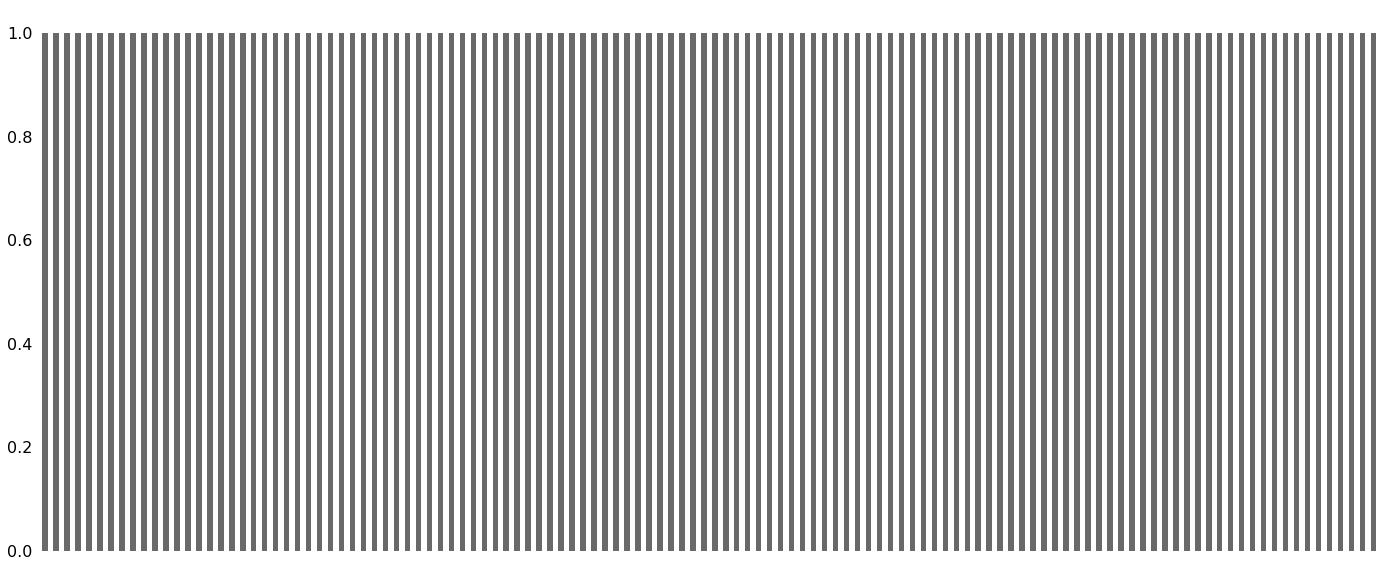

In [107]:
msno.bar(macro);

####  Save the Analytic Set
After this step, you should have a single dataframe with any inconsistencies, such as non-uniform column names and missing data, fixed. Depending on the data, the dataframe could be multiindexed as well. This is a good time to save the set. We'll load it from here during the next notebook.

Be sure to give your analytic set a unique name, as other people will be using the same repository to store their data on git. To adhere to the git repo naming conventions, prepend your initials to the filename.

In [108]:
df.to_pickle(output_loc + "all_missing_included.pkl")

In [109]:
slim.to_pickle(output_loc + "all_missing_excluded.pkl")

In [113]:
macro.to_pickle(output_loc + "macro_engineered.pkl")

## Outcome 

By the end of this notebook you should have an analytic data set and be ready to dive into some analysis.